In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
#import os
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
df = pd.read_csv('train_metric6.csv')
set(df['model'])

{'ACAGE', 'ACAGE_ATT', 'ACAGE_MLP', 'GAE'}

In [5]:
edge_colors = ['red', 'blue', 'brown', 'purple']
palette = {
    'ACAGE': 'blue',
    'ACAGE_woAtt': 'purple',
    'node2vec': 'green',
    'GAE': 'red',
    'ACAGE_wAtt' : 'brown'
}
PROPS1 = {
    'boxprops':{'facecolor':'none'},
    'medianprops':{'color':'red'},
    'capprops':{'color':'black'},
    'whiskerprops':{'linestyle':'dotted'}
}

In [6]:
custom_order = ['GAE', 'ACAGE', 'ACAGE_ATT', 'ACAGE_MLP']

# Sort the DataFrame based on the custom order of 'Name'
df = df.sort_values(by='model', key=lambda x: x.map({name: i for i, name in enumerate(custom_order)}))


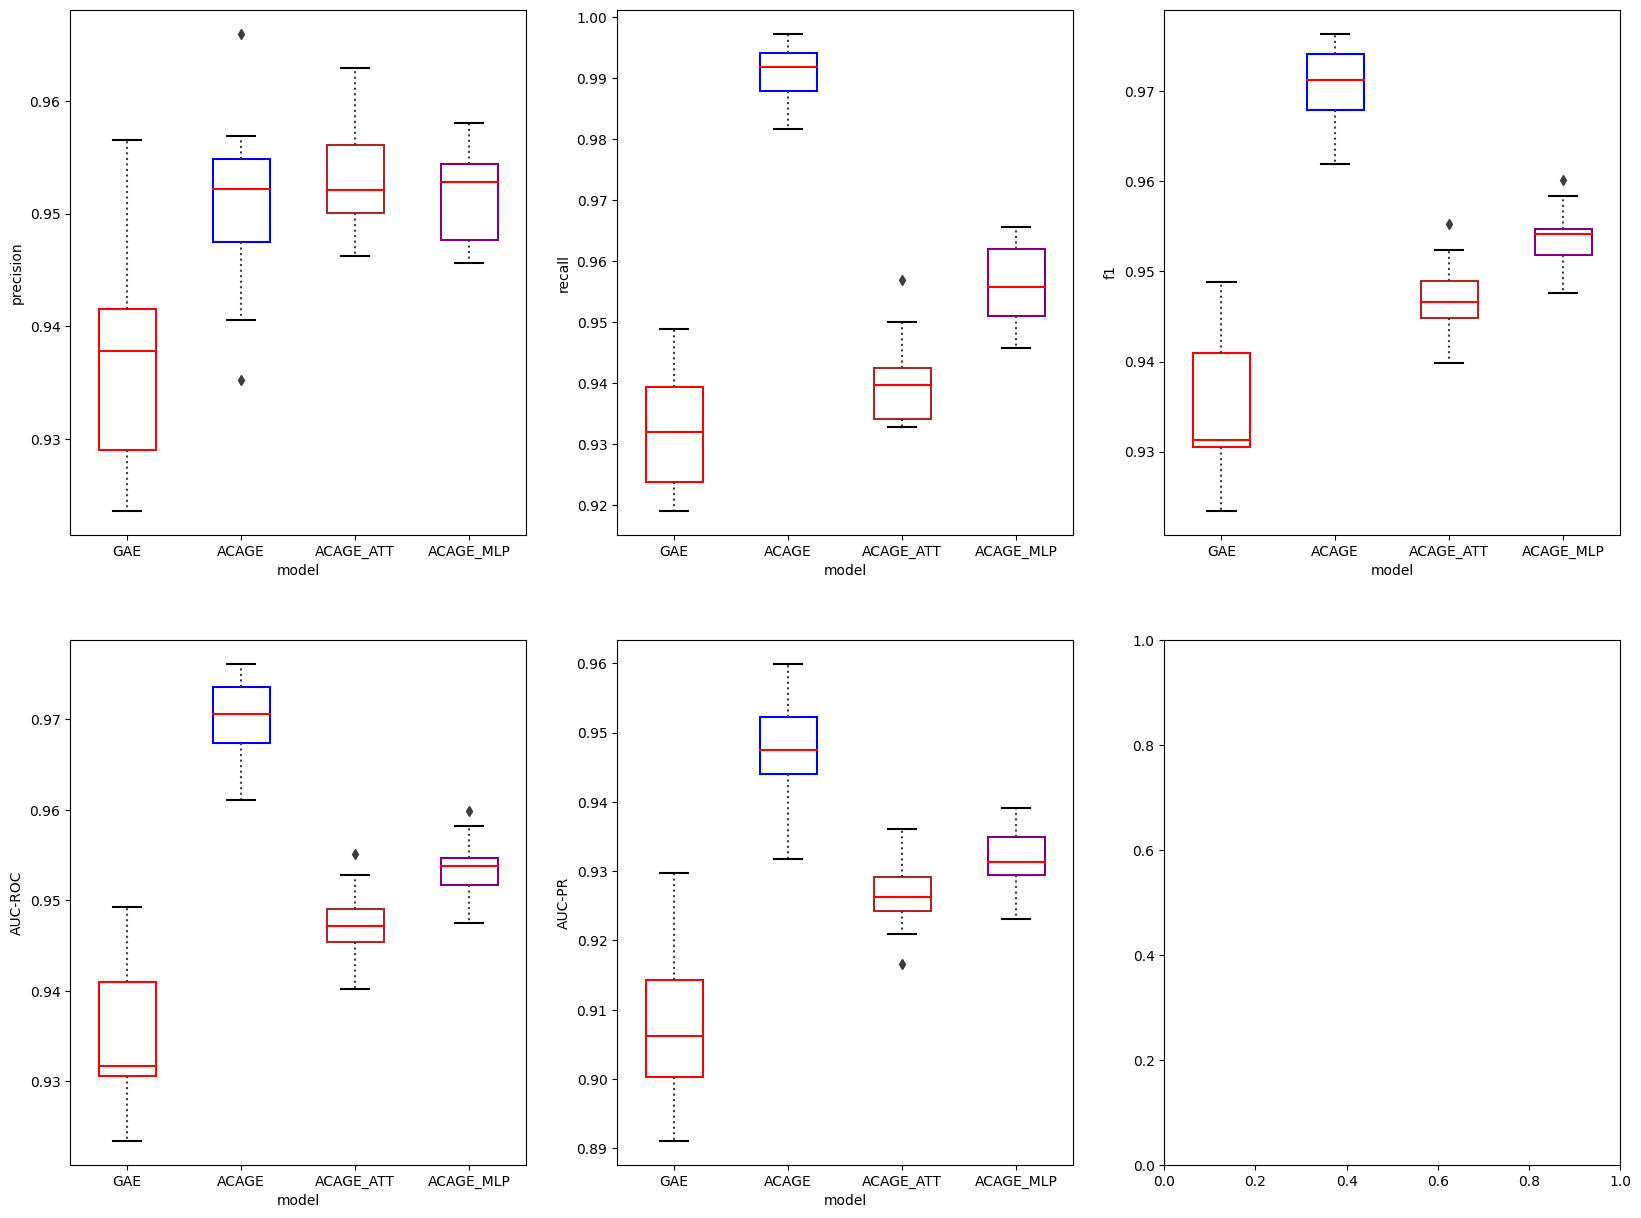

In [7]:
#plot all graph in one fig 

fig, ax = plt.subplots(2,3, figsize = (20,15))
for ty in range(5):
  #sb.boxplot(x='model', y=ty, data=df.sort_values(ty, ascending = True), width = .5, **PROPS)
  sb.boxplot(x='model', y=df.columns[ty], data=df, width = .5, **PROPS1, ax = ax[ty//3, ty%3])

  for i, patch in enumerate(ax[ty//3, ty%3].patches):
      patch.set_edgecolor(edge_colors[i])
      
  #fig.savefig(f'{ty}.png')

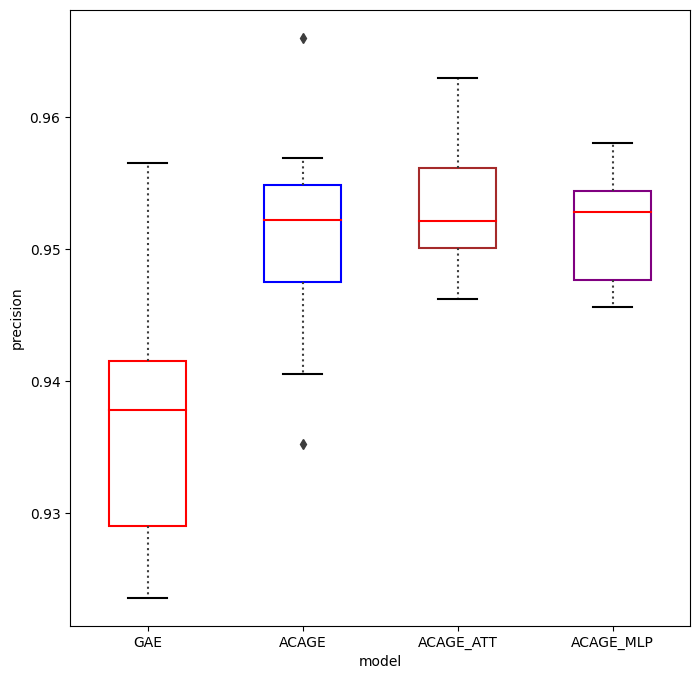

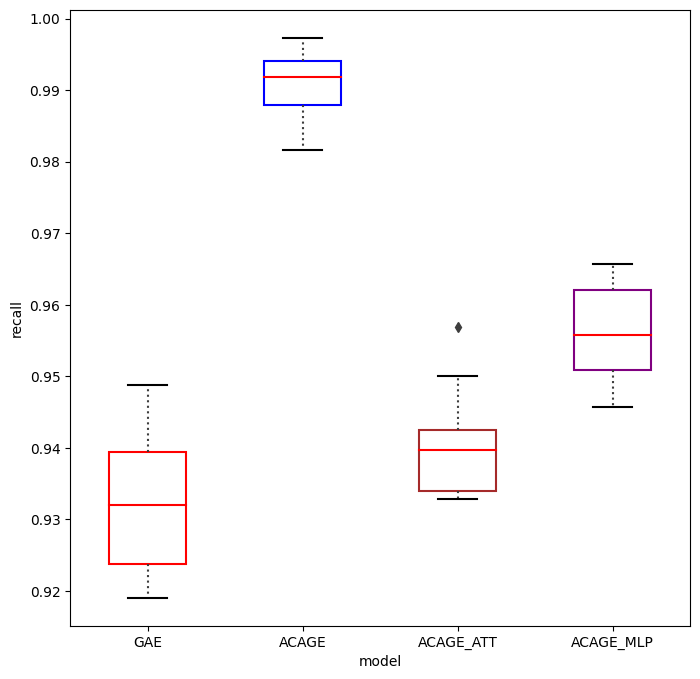

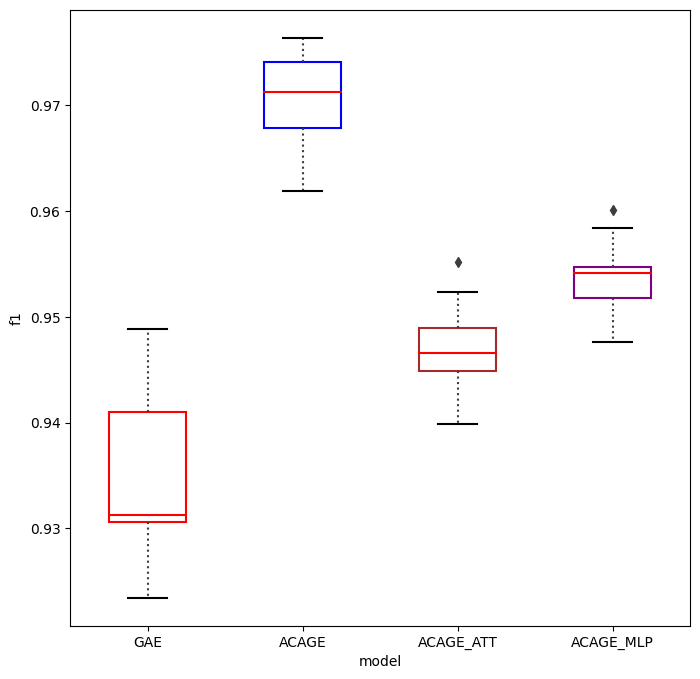

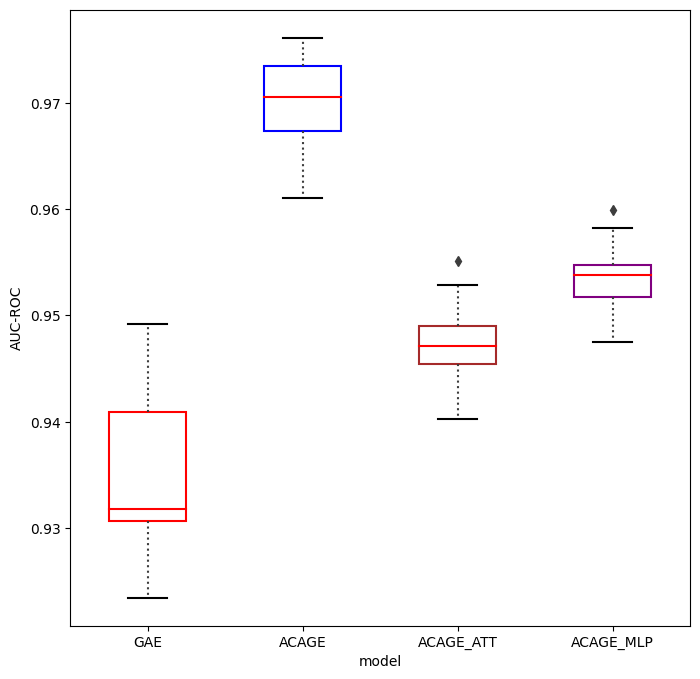

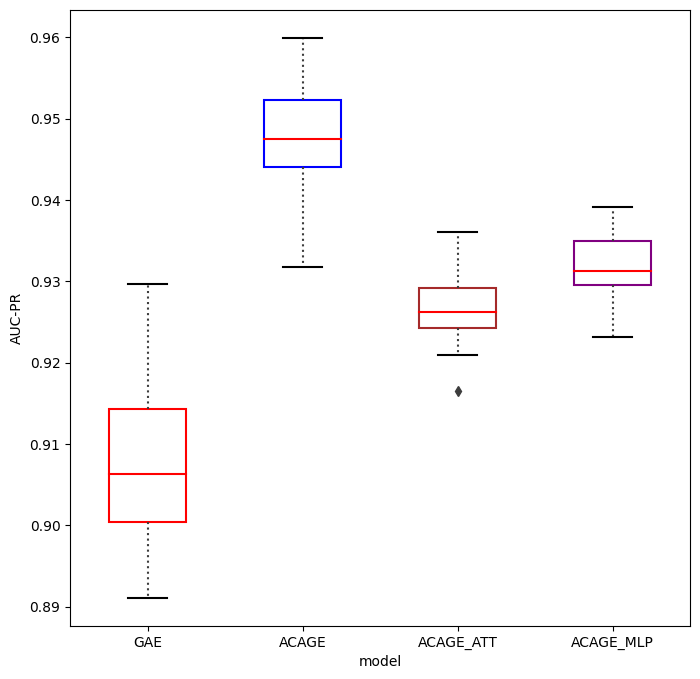

In [8]:
#separate graphs
for ty in df.columns[:-1]:
  fig, ax = plt.subplots(figsize = (8, 8))

  #sb.boxplot(x='model', y=ty, data=df.sort_values(ty, ascending = True), width = .5, **PROPS)
  ax = sb.boxplot(x='model', y=ty, data=df, width = .5, **PROPS1)

  for i, patch in enumerate(ax.patches):
      patch.set_edgecolor(edge_colors[i])
  fig.savefig(f'{ty}.png', dpi = 300)

In [ ]:
PROPS2 = {
    'boxprops':{'facecolor':'none', 'edgecolor':'blue','alpha': 0.7},
    'medianprops':{'color':'red'},
    'capprops':{'color':'black'},
    'whiskerprops':{'linestyle':'dotted'}
    #'capprops':{'color':'yellow'}
}
train_df = df[df['model']=='ACAGE']
train_df.head()

precision    recall        f1   AUC-ROC    AUC-PR  model
30   0.947157  0.992363  0.969234  0.968499  0.943743  ACAGE
31   0.948503  0.991600  0.969573  0.968881  0.944735  ACAGE
32   0.955279  0.995036  0.974752  0.974227  0.953019  ACAGE
33   0.952120  0.994654  0.972923  0.972318  0.949703  ACAGE
34   0.965994  0.987018  0.976393  0.976136  0.959944  ACAGE

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sb.boxplot(train_df, width = .5, **PROPS2)
ax.set_xlabel("metrics")
fig.savefig(f'train_metrics.png', dpi = 300)


In [ ]:
#MATLAB script
"""
f1 = [0.04941 0.687318 0.839097;
0.62823 0.953458 0.83624;
0.666843 0.966897 0.968421;]
bar3(f1)
xlabel("λ2")
ylabel("λ1")
zlabel("f1")
yticklabels({'1';'0.5';'0.1'})
xticklabels({'0.1';'0.5';'1'})
f = gcf;
exportgraphics(f,'f11.png','Resolution',300)

aucroc = [0.507827 0.589538 0.851661;
0.59622 0.952081 0.852997;
0.520237 0.966208 0.967927;]
bar3(aucroc)
xlabel("λ2")
ylabel("λ1")
zlabel("AUC-ROC")
yticklabels({'1';'0.5';'0.1'})
xticklabels({'0.1';'0.5';'1'})
f = gcf;
exportgraphics(f,'aucroc1.png','Resolution',300)

aucpr = [0.505639 0.549701 0.822382;
0.556008 0.918998 0.83317;
0.510336 0.94177 0.946271;]
bar3(aucpr)
xlabel("λ2")
ylabel("λ1")
zlabel("AUC-PR")
yticklabels({'1';'0.5';'0.1'})
xticklabels({'0.1';'0.5';'1'})
f = gcf;
exportgraphics(f,'aucpr1.png','Resolution',300)
"""